In [14]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt 

In [15]:
cnx = sqlite3.connect('C:/Users/windows/Downloads/database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
data.shape

(183978, 42)

In [16]:
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Let's get a brief overview of what this data contains. 

In [17]:
data.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


Let's look at all the columns present in the dataset

In [18]:
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

## Data Cleaning 

In [19]:
# Let's look for null values 
data.isnull().sum()
#data[data.isnull().any(axis = 1)]

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

Let's drop the null values 

In [20]:
data = data.dropna()
data.shape

(180354, 42)

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Declare the Columns You Want to Use as Features
<br><br></p>


In this we can make a dictionay of coorelations of all the features on overall ratings. Let's do that. This is being done to select our features. 

In [21]:
features =list(data.columns[~(data.columns.str.contains('id'))])
features
# We also do not need overall_rating as that is our target and date 
features.remove('date')
features.remove('overall_rating')
features
data[features].head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,positioning,vision,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,45.0,54.0,48.0,65.0,66.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0


We can see above that there are more non numeric values in this data. Remove those. 

In [22]:
remove = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for i in remove:
    features.remove(i)
features

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [23]:
# Let's loop through all the features 
dict1={}
for feature in features:
    co = data['overall_rating'].corr(data[feature])
    dict1[feature] = co
dict1

{'potential': 0.7654346716757733,
 'crossing': 0.35732018035432034,
 'finishing': 0.3300785427711857,
 'heading_accuracy': 0.313324100551651,
 'short_passing': 0.45824265581544127,
 'volleys': 0.36173949987250664,
 'dribbling': 0.35419060093846727,
 'curve': 0.3575657691094526,
 'free_kick_accuracy': 0.3498003114423882,
 'long_passing': 0.4345249915571983,
 'ball_control': 0.4439907628262985,
 'acceleration': 0.24399848837129692,
 'sprint_speed': 0.25304806290254594,
 'agility': 0.2399628207884933,
 'reactions': 0.7718560966627339,
 'balance': 0.16021077852080748,
 'shot_power': 0.4280531322219387,
 'jumping': 0.25897831813049615,
 'stamina': 0.32560565778692446,
 'strength': 0.3156837624075801,
 'long_shots': 0.39266797289955613,
 'aggression': 0.3227818681524768,
 'interceptions': 0.249094025661821,
 'positioning': 0.3689776391472522,
 'vision': 0.43149329504794137,
 'penalties': 0.3927151079111891,
 'marking': 0.13218473835173347,
 'standing_tackle': 0.16398609375977705,
 'gk_diving

Let's also plot these values on line plot to get an idea of the dependence of overall rating on r

### Correlation Plot

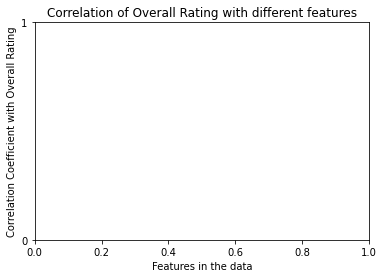

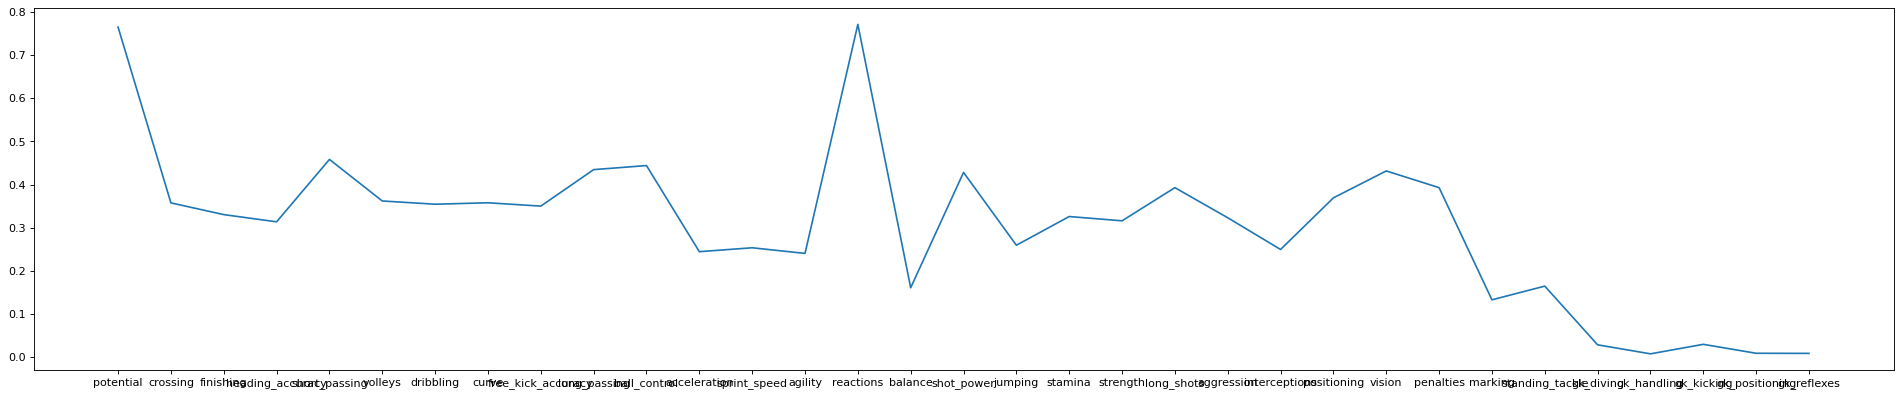

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
x_values = []
y_values = []
for value in dict1:
    x_values.append(value)
    y_values.append(dict1[value])

# Plotting the values using matplotlib.pyplot
plt.xlabel('Features in the data')
plt.ylabel('Correlation Coefficient with Overall Rating')
plt.title('Correlation of Overall Rating with different features')
plt.yticks([0, 1])

#Adjusting the size of the image 
from matplotlib.pyplot import figure
figure(num = None, figsize = (30, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_values, y_values)
plt.show()


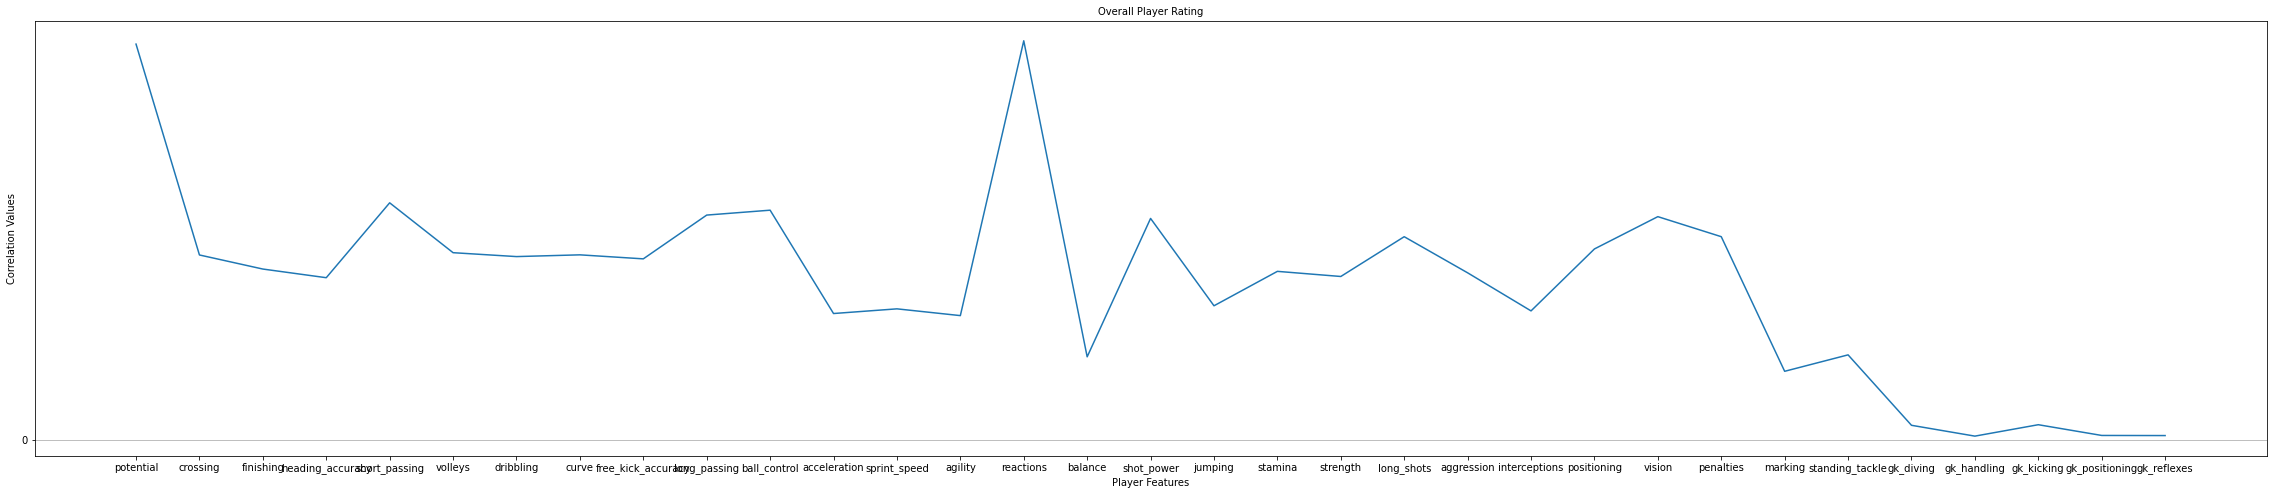

In [25]:
%matplotlib inline

#Plotting a subplot
fig, axis = plt.subplots(figsize = (40, 8))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Overall Player Rating',fontsize=10)
axis.set_xlabel('Player Features',fontsize=10)   
axis.set_ylabel('Correlation Values',fontsize=10)
axis.set_yticks([0,1])
axis.set_yticklabels(['0', '1'])

# # We can also use this to set figure size 
# f.set_figheight(15)
# f.set_figwidth(15)

axis.plot(x_values, y_values)
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>


In [26]:
# Let's also specifiy the target 
target = ['overall_rating']

In [27]:
# Obtain the X and y values for regression analysis
X = data[features]
y = data[target]

In [28]:
# Let us look at a typical row from our features:
X.head()
# X.iloc[2]

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,positioning,vision,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,45.0,54.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,45.0,54.0,48.0,65.0,66.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,44.0,53.0,47.0,62.0,63.0,5.0,10.0,9.0,7.0,7.0


Let us also display our target values: 

In [29]:
y.head() 

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Split the Dataset into Training and Test Datasets
<br><br></p>


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 324)

Feel free to go through the dataset and explore it as much as you can 

In [31]:
X_train.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,positioning,vision,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,...,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000,120837.000000
mean,73.470444,55.110529,49.958291,57.270174,62.459263,49.489453,59.242765,52.975968,49.356356,57.047552,...,55.728899,57.849665,54.930899,46.711860,50.302821,14.722039,15.962404,20.525923,16.033475,16.347634
std,6.587725,17.270936,19.061840,16.506733,14.185052,18.264961,17.742900,18.251842,17.821332,14.429803,...,18.473454,15.140026,15.565191,21.248303,21.521759,16.880294,15.857014,21.140388,16.095265,17.218001
min,39.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,...,45.000000,49.000000,45.000000,25.000000,29.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,...,60.000000,60.000000,57.000000,50.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,...,69.000000,69.000000,67.000000,66.000000,69.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,...,95.000000,97.000000,96.000000,94.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [32]:
X_test.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,positioning,vision,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,...,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000,59517.000000
mean,73.497757,55.206109,49.969941,57.249878,62.542484,49.487861,59.312432,53.053060,49.466741,57.159753,...,55.734446,57.905758,54.938623,46.849959,50.458104,14.645211,15.918107,20.527076,15.977620,16.279987
std,6.570264,17.198968,19.001086,16.421814,14.146917,18.226779,17.738263,18.232587,17.818009,14.375721,...,18.427399,15.177576,15.539409,21.182739,21.444289,16.762343,15.809431,21.151199,16.020999,17.119227
min,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,...,45.000000,49.000000,45.000000,25.000000,29.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,51.000000,59.000000,...,60.000000,60.000000,57.000000,51.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,...,69.000000,69.000000,67.000000,66.000000,69.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,95.000000,97.000000,93.000000,97.000000,94.000000,96.000000,97.000000,...,95.000000,97.000000,96.000000,94.000000,95.000000,94.000000,91.000000,97.000000,94.000000,93.000000


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

(1) Linear Regression: Fit a model to the training set
<br><br></p>



In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [34]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[66.26025486],
       [79.74673933],
       [66.403823  ],
       ...,
       [68.98145792],
       [64.3460468 ],
       [73.59335142]])

In [35]:
#Let's explore the predictions. 
y_prediction.mean()

68.63919405950243

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>

In [36]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall_rating,59517.0,68.635818,7.041297,33.0,64.0,69.0,73.0,94.0


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [37]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [38]:
print(RMSE)

2.810620512882103


That is a pretty low error value and that is very good. Let's also find the accuracy and r2 score. 

In [39]:
from sklearn.metrics import r2_score, accuracy_score

In [40]:
print(r2_score(y_test, y_prediction))

0.8406667689726082
